In [30]:

# third party packages
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

from collections import Counter

## Data Exploration

In [31]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_sub = pd.read_csv('data/sample_submission.csv')

In [23]:
sample_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [21]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [22]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


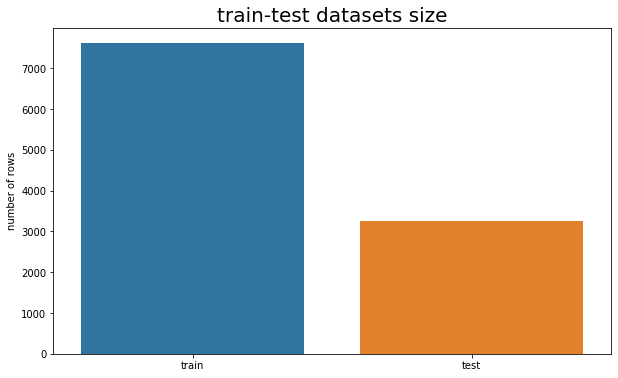

In [64]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.barplot(y=[train.shape[0], test.shape[0]], x=['train', 'test'], ax=ax)
_ = ax.set_ylabel('number of rows')
_ = ax.set_title('train-test datasets size', {'fontsize': 20})

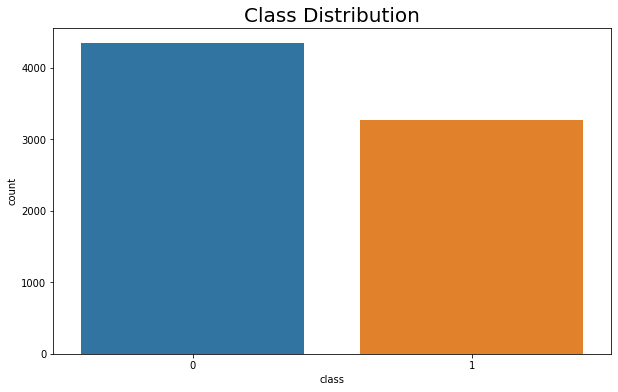

In [62]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.countplot(x='target', ax = ax, data=train)
_ = ax.set_ylabel('count')
_ = ax.set_xlabel('class')
_ = ax.set_title('Class Distribution',
                {'fontsize': 20})

Not highly imbalanced

## Evaluation
- F1 score


## Baseline Appraoch 
1. Tfidf as features.
1. Naive Bayes model.

In [65]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [119]:
## Tfidf feature creation
tfifd = TfidfVectorizer()

train_X = tfifd.fit_transform(train.text.values, )
train_y = train.target.values

In [120]:
f'number of features {train_X.shape[1]}'

'number of features 21637'

In [121]:
from sklearn.naive_bayes import ComplementNB, GaussianNB

In [125]:
model = MultinomialNB()
# model = ComplementNB()


In [117]:
# model = GaussianNB()
# train_X = train_X.toarray()
# train_y = train_y.toarray()

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
model = LogisticRegression()

In [140]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = MultinomialNB()
clf3 = ComplementNB()

eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('mb', clf2), ('cnb', clf3)], voting='soft')

In [141]:
model = eclf1

In [142]:
model.fit(train_X, train_y)
f1_score(y_true=train_y , y_pred=model.predict(train_X))
f1_scorer_func = make_scorer(f1_score)
cv_scores = cross_val_score(model, train_X, train_y, scoring=f1_scorer_func)
print(cv_scores)

[0.62359551 0.62214708 0.66162888 0.63537906 0.76338247]


In [143]:
cv_scores.mean()

0.6612266001990841

model | 5 fold f1 score mean
:------:|:-----------:
Complement NB | 0.6689  
Multinomial NB | 64.05
Gaussian NB  | ~54
logistic regression | 0.639


> Baseline submission

In [144]:
model = ComplementNB()

In [145]:
model.fit(train_X, train_y)
test_X = tfifd.transform(test.text.values)
test_y = model.predict(test_X)
sample_sub.target =test_y

In [146]:
# sample_sub.to_csv('output/naive_bayes.csv', index=False)
sample_sub.to_csv('output/complement_naive_bayes.csv', index=False)